In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Problem statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products

In [2]:
import io
%cd '/Users/shiv/Documents/datasets/black friday'

/Users/shiv/Documents/datasets/black friday


In [3]:
black_friday_train = pd.read_csv('train.csv')

In [4]:
black_friday_test = pd.read_csv('test.csv')

In [5]:
black_friday_train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [6]:
black_friday_test.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN


In [7]:
print(black_friday_train.shape)
print(black_friday_test.shape)

(550068, 12)
(233599, 11)


In [8]:
black_friday_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
black_friday_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
black_friday_test['Purchase'] = 123456

In [11]:
data = pd.concat([black_friday_train,black_friday_test],axis=0)

In [12]:
data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [13]:
data.shape

(783667, 12)

Data Visualization and manipulation

In [14]:
import seaborn as sns
import plotly.express as px

In [15]:
data = data.drop(['User_ID','Product_ID'],axis=1)

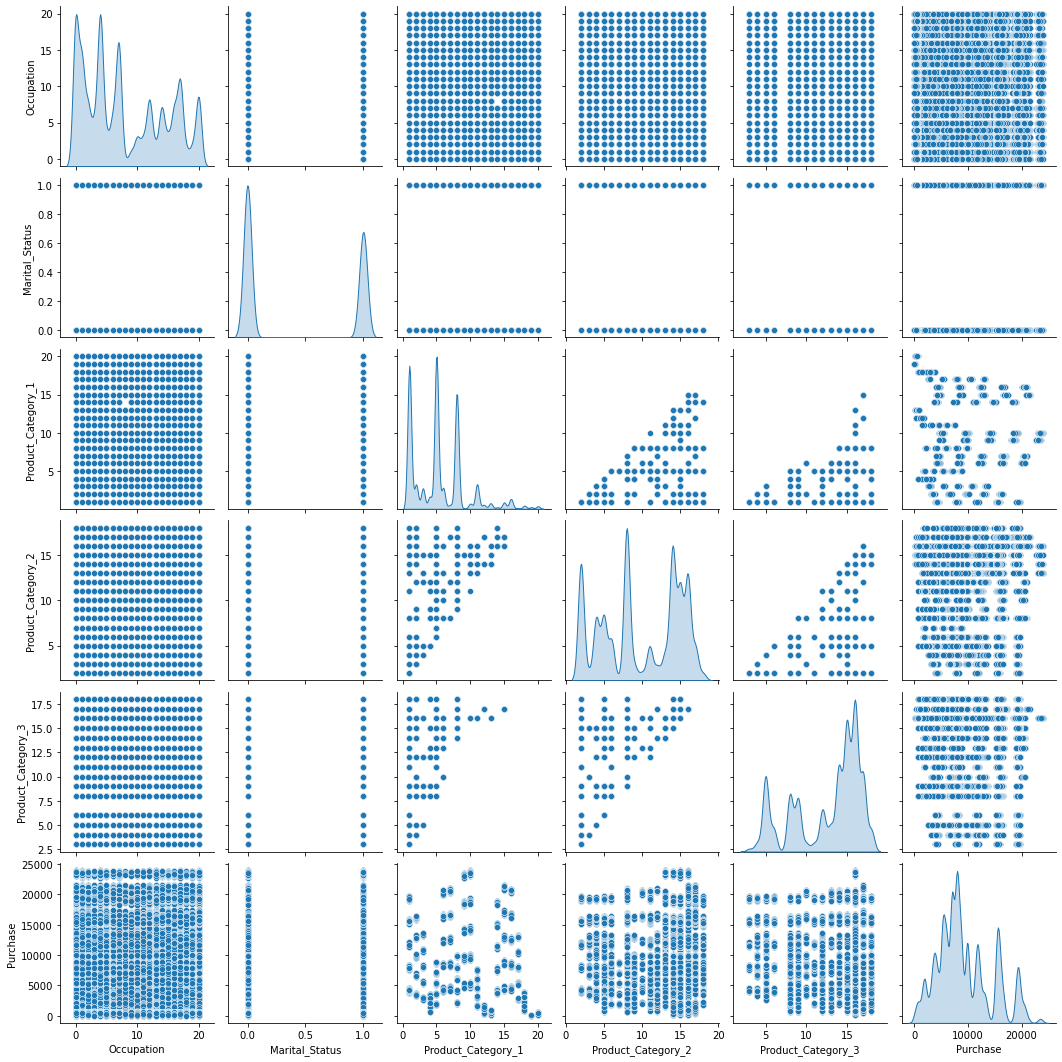

In [16]:
vis = black_friday_train.iloc[:,2:12]
sns.pairplot(vis , diag_kind='kde')

As you can see data is not good for muliple linear regression hence we have to try other non parametric models but for learning purpose we check mlr model also

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

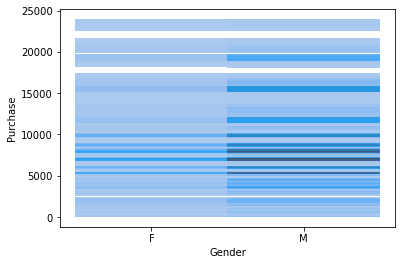

In [73]:
sns.histplot(black_friday_train,
            x='Gender',
            y='Purchase')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

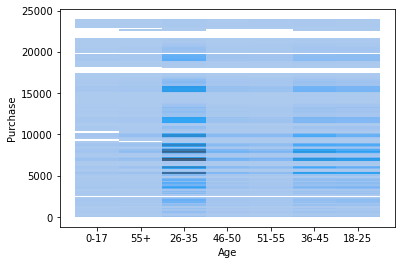

In [74]:
sns.histplot(black_friday_train,
            x='Age',
            y='Purchase')

<AxesSubplot:xlabel='City_Category', ylabel='Purchase'>

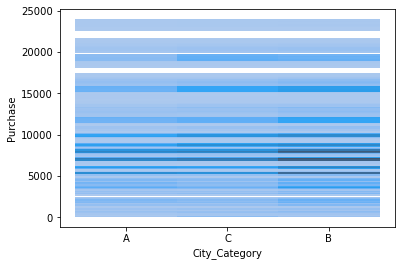

In [75]:
sns.histplot(black_friday_train,
            x='City_Category',
            y='Purchase')

In [20]:
# missing imputation

In [21]:
data.isnull().sum().sort_values(ascending=False)

Product_Category_3            545809
Product_Category_2            245982
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
dtype: int64

In [22]:
data.Product_Category_3.value_counts(dropna=False)

NaN     545809
16.0     46469
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: Product_Category_3, dtype: int64

In [23]:
 (545809/783667*100) # 69% value is missing in this column

69.64807756355697

In [24]:
data.Product_Category_3=data.Product_Category_3.fillna(16)

In [25]:
data.Product_Category_2=data.Product_Category_2.fillna(8) # we do mode imputation 

In [26]:
data.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 65.8+ MB


In [28]:
 male_female = pd.get_dummies(data['Gender'])

In [29]:
City_categories_dummies =  pd.get_dummies(data['City_Category'])

In [30]:
df_data = pd.concat([data,male_female,City_categories_dummies],axis=1)

In [31]:
df_data = df_data.drop(['Gender','City_Category'],axis=1)

In [32]:
df_data['Age'] = df_data['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [33]:
df_data['Stay_In_Current_City_Years']=df_data['Stay_In_Current_City_Years'].str.replace('+','')

/var/folders/nh/lrwb66t52tq1ljsvgv7nwcdm0000gn/T/ipykernel_4922/3143221593.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [34]:
df_data

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,F,M,A,B,C
0,1,10,2,0,3,8.0,16.0,8370,1,0,1,0,0
1,1,10,2,0,1,6.0,14.0,15200,1,0,1,0,0
2,1,10,2,0,12,8.0,16.0,1422,1,0,1,0,0
3,1,10,2,0,12,14.0,16.0,1057,1,0,1,0,0
4,7,16,4,0,8,8.0,16.0,7969,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,3,15,4,1,8,8.0,16.0,123456,1,0,0,1,0
233595,3,15,4,1,5,8.0,16.0,123456,1,0,0,1,0
233596,3,15,4,1,1,5.0,12.0,123456,1,0,0,1,0
233597,5,1,4,0,10,16.0,16.0,123456,1,0,0,0,1


In [35]:
df_data = df_data.astype('float')

In [36]:
df_train = df_data[df_data.Purchase != 123456]

In [37]:
df_test = df_data[df_data.Purchase == 123456]

In [38]:
df_test = df_test.drop('Purchase',axis=1)

Modeling

In [39]:
y = df_train.Purchase
X = df_train.drop('Purchase',axis = 1)

In [40]:
X

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,F,M,A,B,C
0,1.0,10.0,2.0,0.0,3.0,8.0,16.0,1.0,0.0,1.0,0.0,0.0
1,1.0,10.0,2.0,0.0,1.0,6.0,14.0,1.0,0.0,1.0,0.0,0.0
2,1.0,10.0,2.0,0.0,12.0,8.0,16.0,1.0,0.0,1.0,0.0,0.0
3,1.0,10.0,2.0,0.0,12.0,14.0,16.0,1.0,0.0,1.0,0.0,0.0
4,7.0,16.0,4.0,0.0,8.0,8.0,16.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,6.0,13.0,1.0,1.0,20.0,8.0,16.0,0.0,1.0,0.0,1.0,0.0
550064,3.0,1.0,3.0,0.0,20.0,8.0,16.0,1.0,0.0,0.0,0.0,1.0
550065,3.0,15.0,4.0,1.0,20.0,8.0,16.0,1.0,0.0,0.0,1.0,0.0
550066,7.0,1.0,2.0,0.0,20.0,8.0,16.0,1.0,0.0,0.0,0.0,1.0


In [41]:
y

0          8370.0
1         15200.0
2          1422.0
3          1057.0
4          7969.0
           ...   
550063      368.0
550064      371.0
550065      137.0
550066      365.0
550067      490.0
Name: Purchase, Length: 550068, dtype: float64

Multiple linear regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
reg = LinearRegression()

In [44]:
regmodel = reg.fit(X,y)

In [45]:
regmodel.score(X,y)

0.13125099431547005

In [46]:
reg_coeff = regmodel.coef_

In [47]:
X.columns

Index(['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'F',
       'M', 'A', 'B', 'C'],
      dtype='object')

In [48]:
reg_coeff

array([ 1.20790737e+02,  6.47618253e+00,  9.61417805e+00, -5.02280202e+01,
       -4.02592429e+02, -2.48953058e+00, -1.54578458e+02, -1.45687941e+14,
       -1.45687941e+14,  7.63757999e+13,  7.63757999e+13,  7.63758000e+13])

In [49]:
# Multiple linear regression is not good for this model 

Decision tree model

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
tree = DecisionTreeRegressor()

In [52]:
treemodel = tree.fit(X,y)

In [53]:
treemodel.score(X,y)

0.7800802851332419

In [54]:
from sklearn.tree import export_graphviz,plot_tree

[Text(0.5, 0.9, 'Product_Category_1 <= 2.5\nsquared_error = 25231140.081\nsamples = 550068\nvalue = 9263.969'),
 Text(0.25, 0.7, 'Product_Category_1 <= 1.5\nsquared_error = 18335484.83\nsamples = 164242\nvalue = 13264.146'),
 Text(0.125, 0.5, 'C <= 0.5\nsquared_error = 18479849.804\nsamples = 140378\nvalue = 13606.219'),
 Text(0.0625, 0.3, 'Product_Category_3 <= 16.5\nsquared_error = 18797281.639\nsamples = 93334\nvalue = 13289.809'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Product_Category_3 <= 16.5\nsquared_error = 17257379.299\nsamples = 47044\nvalue = 14233.967'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Product_Category_2 <= 15.5\nsquared_error = 12748955.13\nsamples = 23864\nvalue = 11251.935'),
 Text(0.3125, 0.3, 'Product_Category_3 <= 17.0\nsquared_error = 12747733.15\nsamples = 22272\nvalue = 11103.312'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (

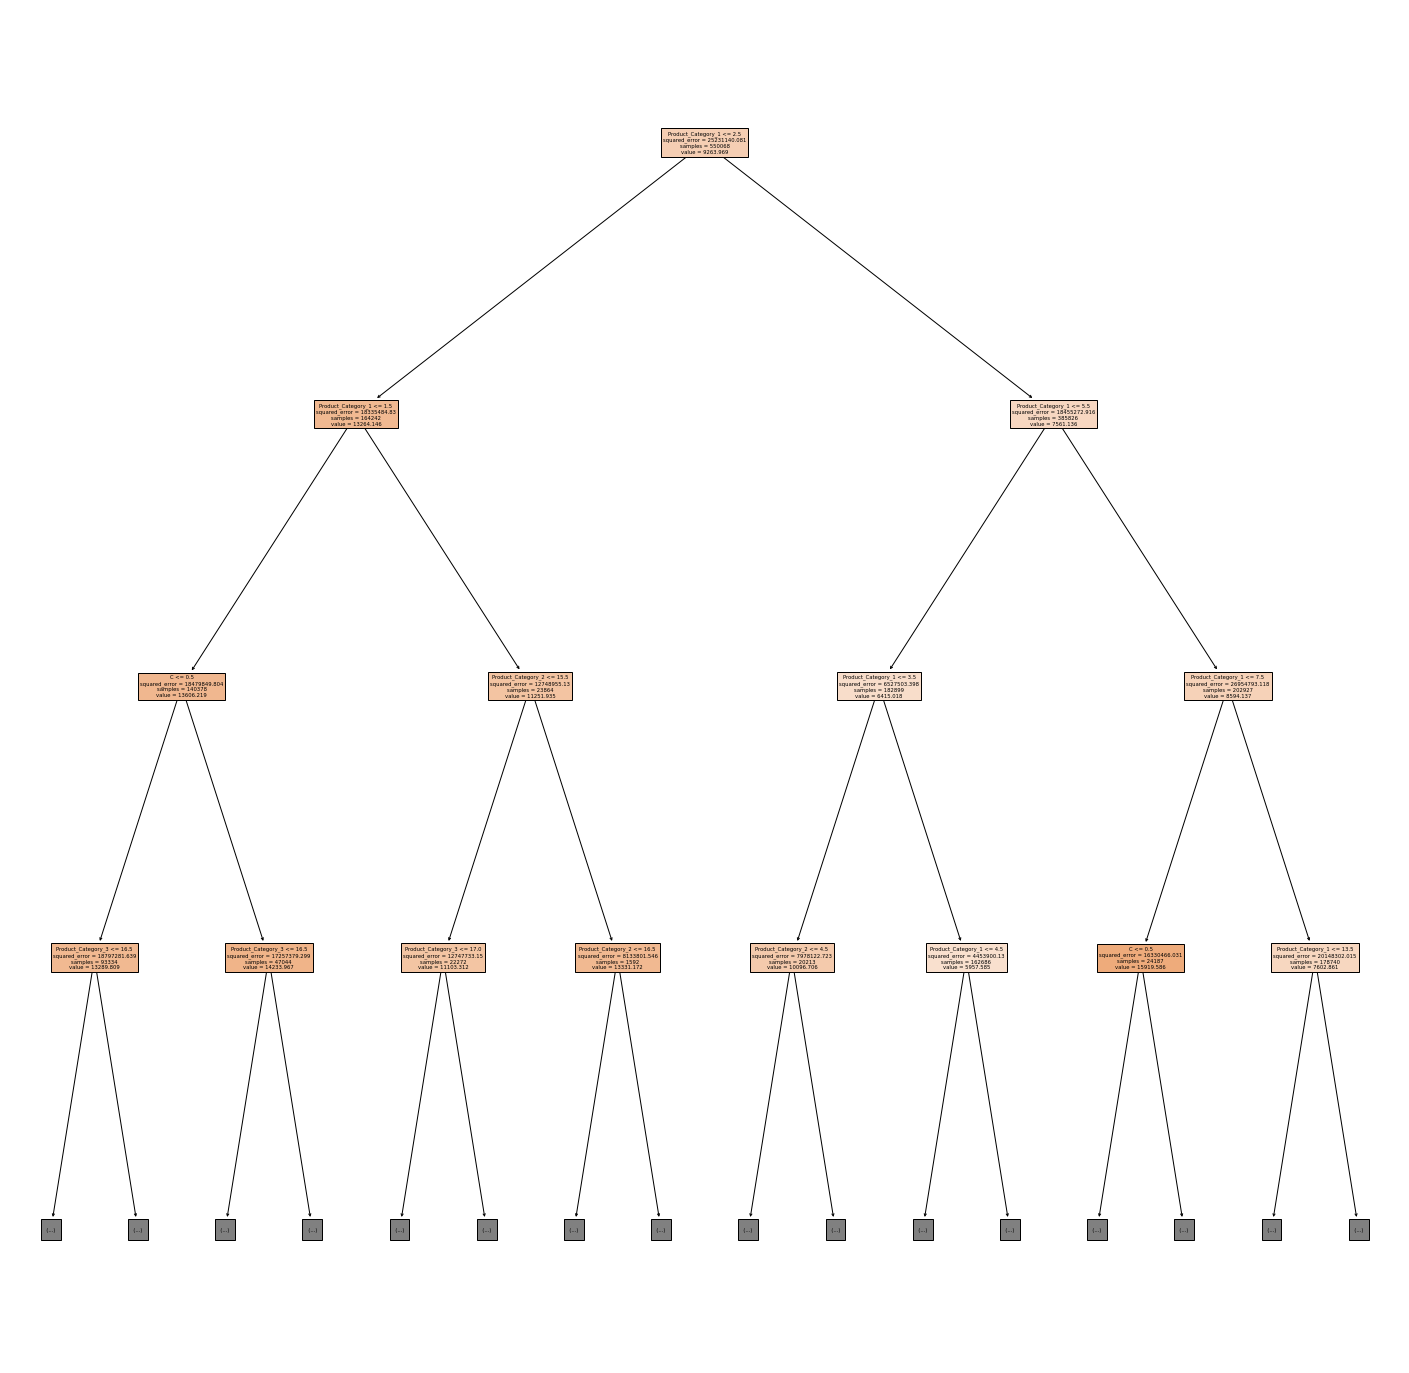

In [55]:
plt.figure(figsize=(25,25))
plot_tree(treemodel,max_depth=3,filled=True,feature_names=X.columns)

Random forest model

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
forest = RandomForestRegressor()

In [58]:
forest_model = forest.fit(X,y)

In [59]:
forest_model.score(X,y)

0.7717199964114541

Gradient boosting model

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gbm = GradientBoostingRegressor()

In [62]:
gbmmodel = gbm.fit(X,y)

In [63]:
gbmmodel.score(X,y)

0.647787097870723

Xgboost model

In [64]:
import xgboost
from xgboost import XGBRegressor

In [65]:
xgboost = XGBRegressor()

In [66]:
xgboostmodel = xgboost.fit(X,y)

In [67]:
xgboostmodel.score(X,y)

0.6773880355525823

Knn model

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [69]:
knn = KNeighborsRegressor()

In [70]:
knnmodel = knn.fit(X,y)

In [71]:
knnmodel.score(X,y)

0.6822509168253266

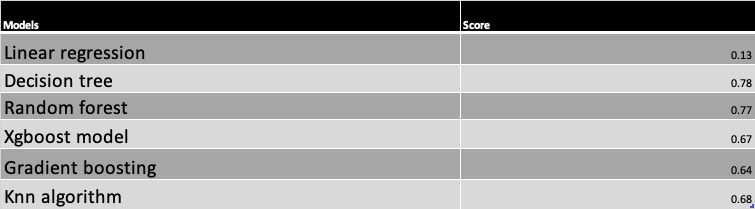

# As you see Decision tree and Random forest fits good to this data 
Hence the best model for this data is Decision tree and random forest